In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# --- Apply sequence of single-qubit gates ---
qc.x(0)        # Pauli-X (NOT gate)
qc.h(0)        # Hadamard (superposition)
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(0.5, 0)  # Z-axis rotation by 0.5 radians

# Measure final state
qc.measure_all()

# Display circuit
print("Quantum Circuit:")
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# --- Display results ---
counts = result.get_counts()
print("\nMeasurement Counts:", counts)


Quantum Circuit:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 

Measurement Counts: {'0 0': 520, '1 0': 504}


In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# --- Apply sequence of single-qubit gates ---
qc.h(0)        # Hadamard (superposition)
qc.x(0)        # Pauli-X (NOT gate)
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(0.5, 0)  # Z-axis rotation by 0.5 radians

# Measure final state
qc.measure_all()

# Display circuit
print("Quantum Circuit:")
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# --- Display results ---
counts = result.get_counts()
print("\nMeasurement Counts:", counts)

#Results are still ~50 50 split only relative phase difference

#Matrices in quantum computing are not generally commutative: HX ≠ XH. That’s why order matters.


Quantum Circuit:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ H ├┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 

Measurement Counts: {'1 0': 510, '0 0': 514}


Theta = $\pi/4$, counts = {'1 0': 80, '0 0': 432}
Theta = $\pi/2$, counts = {'1 0': 267, '0 0': 245}
Theta = $\pi$, counts = {'1 0': 512}


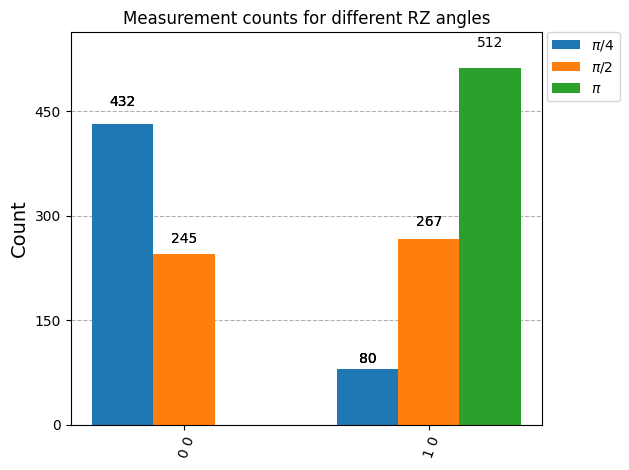

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

sim = AerSimulator()

def run_rz(theta):
    qc = QuantumCircuit(1, 1)
    qc.h(0)              # Put qubit in superposition first
    qc.rz(theta, 0)      # Apply Z rotation by θ
    qc.h(0)              # Rotate back to X basis
    qc.measure_all()
    result = sim.run(transpile(qc, sim), shots=512).result()
    counts = result.get_counts()
    return counts

thetas = [np.pi/4, np.pi/2, np.pi]   # π/4, π/2, π
labels = [r"$\pi/4$", r"$\pi/2$", r"$\pi$"]
results = []

for theta, label in zip(thetas, labels):
    counts = run_rz(theta)
    print(f"Theta = {label}, counts = {counts}")
    results.append(counts)

# Plot histograms for comparison
plot_histogram(results, legend=labels, title="Measurement counts for different RZ angles")


In [15]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Initialize simulator
sim = AerSimulator()

# Create a single-qubit circuit with one classical bit
qc = QuantumCircuit(1, 1)

# --- Apply sequence of single-qubit gates --- #Hadamard gate removed
qc.x(0)        # Pauli-X (NOT gate)
qc.s(0)        # Phase gate (π/2)
qc.t(0)        # T gate (π/4)
qc.rz(0.5, 0)  # Z-axis rotation by 0.5 radians

# Measure final state
qc.measure_all()

# Display circuit
print("Quantum Circuit:")
print(qc.draw())

# --- Run simulation ---
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()

# --- Display results ---
counts = result.get_counts()
print("\nMeasurement Counts:", counts)

# In this there is no superposition so the measurement is deterministic


Quantum Circuit:
        ┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/══════════════════════════════╬═
                                      ║ 
meas: 1/══════════════════════════════╩═
                                      0 

Measurement Counts: {'1 0': 1024}
